In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import accuracy_score
from statsmodels.api import Logit
from sklearn.neural_network import MLPClassifier

from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
# import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import font_manager,rc
"""font_path = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'font_path = "C:\\Windows\\Fonts\\malgun.ttf"\nfont_name = font_manager.FontProperties(fname=font_path).get_name()\nmatplotlib.rc(\'font\',family=font_name)\nmatplotlib.rcParams[\'axes.unicode_minus\'] = False'

# ReadData

In [9]:
df_order_raw=pd.read_csv("0427_member_isbuy_new.csv")
df_order_raw.head()

,Unnamed: 0,ID,나이,성별,유입경로,유입기기,회원구분,구매여부,주소(동/읍/면),AgeGroup
0,0,cgh1385,53,남자,블로그광고,모바일,일반,1,전라북도,50-55
1,1,pjkl77,28,남자,이메일광고,PC,사업자,1,전라북도,25-30
2,2,bear011,40,남자,SNS광고,모바일,사업자,1,경기도,40-45
3,3,kim0750,44,남자,SNS광고,PC,사업자,1,경상북도,40-45
4,4,nonane9979,45,남자,블로그광고,PC,사업자,1,부산광역시,45-50


In [45]:
df_order=pd.DataFrame()
df_order=df_order_raw.drop(["Unnamed: 0","ID"],axis=1)

In [46]:
df_raw_dummy=pd.get_dummies(df_order)
print(df_raw_dummy.columns)
df_raw_dummy.head()

Index(['나이', '구매여부', '성별_남자', '성별_여자', '유입경로_SNS광고', '유입경로_기타', '유입경로_블로그광고',
       '유입경로_신문광고', '유입경로_유튜브광고', '유입경로_이메일광고', '유입경로_인터넷검색', '유입경로_인터넷기사광고',
       '유입경로_잡지광고', '유입경로_전단지광고', '유입경로_지인추천', '유입경로_카카오톡광고', '유입기기_PC',
       '유입기기_모바일', '회원구분_VIP', '회원구분_관리자', '회원구분_딜러', '회원구분_딜러 유치 회원',
       '회원구분_사업자', '회원구분_사업자(수신거부)', '회원구분_일반', '회원구분_일반(수신거부)',
       '회원구분_전화주문 고객', '회원구분_특별회원', '주소(동/읍/면)_-', '주소(동/읍/면)_강원도',
       '주소(동/읍/면)_경기도', '주소(동/읍/면)_경상남도', '주소(동/읍/면)_경상북도', '주소(동/읍/면)_광주광역시',
       '주소(동/읍/면)_대구광역시', '주소(동/읍/면)_대전광역시', '주소(동/읍/면)_부산광역시',
       '주소(동/읍/면)_서울특별시', '주소(동/읍/면)_세종특별자치시', '주소(동/읍/면)_오프라인',
       '주소(동/읍/면)_울산광역시', '주소(동/읍/면)_인천광역시', '주소(동/읍/면)_전라남도',
       '주소(동/읍/면)_전라북도', '주소(동/읍/면)_제주특별자치도', '주소(동/읍/면)_충청남도',
       '주소(동/읍/면)_충청북도', 'AgeGroup_20-25', 'AgeGroup_25-30', 'AgeGroup_30-35',
       'AgeGroup_35-40', 'AgeGroup_40-45', 'AgeGroup_45-50', 'AgeGroup_50-55',
       'AgeGroup_55-60', 'AgeGroup_60-65', 'AgeGroup_65-70', 'AgeGroup_70-

,나이,구매여부,성별_남자,성별_여자,유입경로_SNS광고,유입경로_기타,유입경로_블로그광고,유입경로_신문광고,유입경로_유튜브광고,유입경로_이메일광고,...,AgeGroup_45-50,AgeGroup_50-55,AgeGroup_55-60,AgeGroup_60-65,AgeGroup_65-70,AgeGroup_70-75,AgeGroup_75-80,AgeGroup_80-85,AgeGroup_85-90,AgeGroup_90-95
0,53,1,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,28,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,40,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45,1,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
df_train,df_test=train_test_split(df_raw_dummy,
                                  test_size=0.3,
                                 random_state=1234)
print(f"train data size {df_train.shape}")
print(f"test data size {df_test.shape}")
df_train_x=df_train.drop("구매여부",axis=1)
df_train_y=df_train["구매여부"]
print(f"train_x data size {df_train_x.shape}")
print(f"test_y data size {df_train_y.shape}")

df_test_x=df_test.drop("구매여부",axis=1)
df_test_y=df_test["구매여부"]

train data size (4602, 62)
test data size (1973, 62)
train_x data size (4602, 61)
test_y data size (4602,)


# isbuy GB 

In [21]:
gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy on train : ",gb_uncustomized.score(df_train_x,df_train_y))
print("Accuracy on test : ",gb_uncustomized.score(df_test_x,df_test_y))

Accuracy on train :  0.9000434593654932
Accuracy on test :  0.8748099341104917


   MinSampleLeaf  TrainScore  TestScore
0            0.1       0.900      0.875
1            0.2       0.911      0.877
2            0.3       0.914      0.883
3            0.4       0.919      0.881
4            0.5       0.925      0.879
5            0.6       0.929      0.877
6            0.7       0.929      0.877
7            0.8       0.926      0.873
8            0.9       0.935      0.865


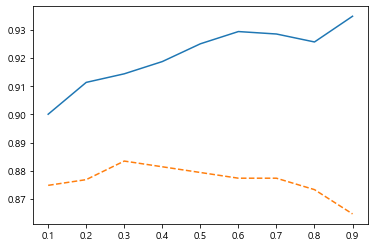

In [22]:
train_score=[]
test_score=[]
para_lr=[ i*0.1 for i in range(1,10)]
for n in para_lr:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=n)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["MinSampleLeaf"]=para_lr
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_lr,train_score,linestyle="-",label="Train")
plt.plot(para_lr,test_score,linestyle="--",label="Test")

    MinSampleLeaf  TrainScore  TestScore
0              10       0.893      0.868
1              20       0.896      0.872
2              30       0.900      0.875
3              40       0.903      0.876
4              50       0.906      0.877
5              60       0.908      0.882
6              70       0.910      0.883
7              80       0.912      0.885
8              90       0.913      0.885
9             100       0.914      0.883
10            110       0.917      0.885
11            120       0.917      0.884
12            130       0.919      0.883
13            140       0.920      0.884
14            150       0.921      0.880


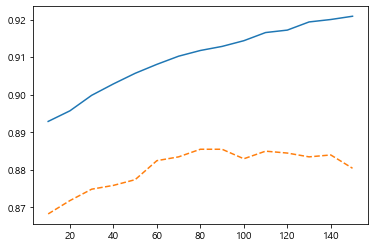

In [23]:
train_score=[]
test_score=[]
para_tree=[ i*10 for i in range(1,16)]
for n in para_tree:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=0.3,n_estimators=n)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["MinSampleLeaf"]=para_tree
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_tree,train_score,linestyle="-",label="Train")
plt.plot(para_tree,test_score,linestyle="--",label="Test")

   MinSampleLeaf  TrainScore  TestScore
0              1       0.891      0.868
1              2       0.905      0.875
2              3       0.920      0.884
3              4       0.939      0.877
4              5       0.951      0.867
5              6       0.955      0.872
6              7       0.956      0.866
7              8       0.956      0.868
8              9       0.956      0.864
9             10       0.956      0.865


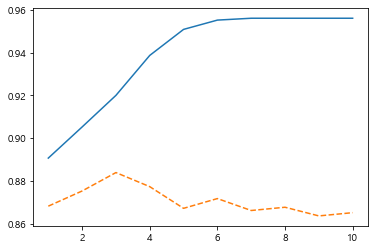

In [26]:
train_score=[]
test_score=[]
para_depth=[ i for i in range(1,11)]
for n in para_depth:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=0.3,n_estimators=140,max_depth=n)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["MinSampleLeaf"]=para_depth
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_depth,train_score,linestyle="-",label="Train")
plt.plot(para_depth,test_score,linestyle="--",label="Test")

   MinSampleLeaf  TrainScore  TestScore
0             10       0.905      0.833
1             20       0.902      0.836
2             30       0.902      0.834
3             40       0.900      0.837
4             50       0.899      0.838
5             60       0.900      0.839
6             70       0.896      0.837
7             80       0.896      0.841
8             90       0.896      0.841
9            100       0.892      0.840


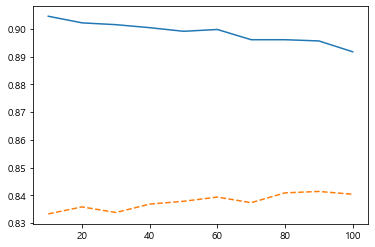

In [43]:
train_score=[]
test_score=[]
para_split=[ i*10 for i in range(1,11)]
for n in para_split:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=0.3,n_estimators=140,max_depth=5,min_samples_split=n)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["MinSampleLeaf"]=para_split
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_split,train_score,linestyle="-",label="Train")
plt.plot(para_split,test_score,linestyle="--",label="Test")

In [48]:
gb_fianl=GradientBoostingClassifier(random_state=1234,learning_rate=0.3,
                                    n_estimators=140,max_depth=5,min_samples_leaf=70)
gb_fianl.fit(df_train_x,df_train_y)

y_pred=gb_fianl.predict(df_test_x)

print(f"Accuarcy on training set : {gb_fianl.score(df_train_x,df_train_y).round(3)}")

print(f"Accuarcy on test set : {gb_fianl.score(df_test_x,df_test_y).round(3)}")

print(f"Confusion matrix :\n {confusion_matrix(df_test_y,y_pred)}")


Accuarcy on training set : 0.917
Accuarcy on test set : 0.88
Confusion matrix :
 [[ 357  148]
 [  88 1380]]


In [38]:
v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["importance"]=gb_fianl.feature_importances_
df_importance.sort_values("importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,importance
0,나이,0.492
27,주소(동/읍/면)_-,0.228
21,회원구분_사업자,0.132
3,유입경로_SNS광고,0.025
5,유입경로_블로그광고,0.022
...,...,...
19,회원구분_딜러,0.000
37,주소(동/읍/면)_세종특별자치시,0.000
26,회원구분_특별회원,0.000
18,회원구분_관리자,0.000


Text(0, 0.5, '변수')

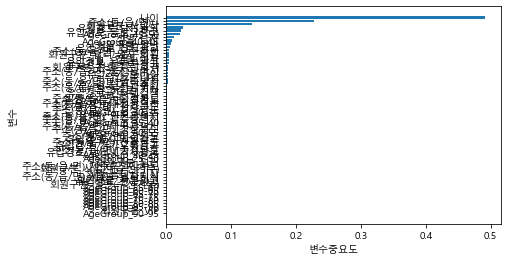

In [39]:
df_importance.sort_values("importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

In [ ]:
df_order_raw=pd.read_csv("0427_member_isbuy_new.csv")
df_order_raw.head()

df_order=pd.DataFrame()
df_order=df_order_raw.drop(["Unnamed: 0","ID"],axis=1)

df_raw_dummy=pd.get_dummies(df_order)
print(df_raw_dummy.columns)
df_raw_dummy.head()

df_train,df_test=train_test_split(df_raw_dummy,
                                  test_size=0.3,
                                 random_state=1234)
print(f"train data size {df_train.shape}")
print(f"test data size {df_test.shape}")
df_train_x=df_train.drop("구매여부",axis=1)
df_train_y=df_train["구매여부"]
print(f"train_x data size {df_train_x.shape}")
print(f"test_y data size {df_train_y.shape}")

df_test_x=df_test.drop("구매여부",axis=1)
df_test_y=df_test["구매여부"]

# GB 

gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy on train : ",gb_uncustomized.score(df_train_x,df_train_y))
print("Accuracy on test : ",gb_uncustomized.score(df_test_x,df_test_y))

train_score=[]
test_score=[]
para_lr=[ i*0.1 for i in range(1,10)]
for n in para_lr:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=n)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["MinSampleLeaf"]=para_lr
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_lr,train_score,linestyle="-",label="Train")
plt.plot(para_lr,test_score,linestyle="--",label="Test")

train_score=[]
test_score=[]
para_tree=[ i*10 for i in range(1,16)]
for n in para_tree:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=0.3,n_estimators=n)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["MinSampleLeaf"]=para_tree
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_tree,train_score,linestyle="-",label="Train")
plt.plot(para_tree,test_score,linestyle="--",label="Test")

train_score=[]
test_score=[]
para_depth=[ i for i in range(1,11)]
for n in para_depth:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=0.3,n_estimators=140,max_depth=n)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["MinSampleLeaf"]=para_depth
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_depth,train_score,linestyle="-",label="Train")
plt.plot(para_depth,test_score,linestyle="--",label="Test")

train_score=[]
test_score=[]
para_split=[ i*10 for i in range(1,11)]
for n in para_split:
    gb=GradientBoostingClassifier(random_state=1234,learning_rate=0.3,n_estimators=140,max_depth=5,min_samples_split=n)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["MinSampleLeaf"]=para_split
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_split,train_score,linestyle="-",label="Train")
plt.plot(para_split,test_score,linestyle="--",label="Test")

gb_fianl=GradientBoostingClassifier(random_state=1234,learning_rate=0.3,
                                    n_estimators=140,max_depth=5,min_samples_leaf=70)
gb_fianl.fit(df_train_x,df_train_y)

y_pred=gb_fianl.predict(df_test_x)

print(f"Accuarcy on training set : {gb_fianl.score(df_train_x,df_train_y).round(3)}")

print(f"Accuarcy on test set : {gb_fianl.score(df_test_x,df_test_y).round(3)}")

print(f"Confusion matrix :\n {confusion_matrix(df_test_y,y_pred)}")


v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["importance"]=gb_fianl.feature_importances_
df_importance.sort_values("importance",ascending=False,inplace=True)
df_importance.round(3)

df_importance.sort_values("importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

# isbuy MPL

In [25]:
df_order_raw=pd.read_csv("0427_member_isbuy_new.csv")
df_order_raw.head()

df_order=pd.DataFrame()
df_order=df_order_raw.drop(["Unnamed: 0","ID"],axis=1)

df_raw_dummy=pd.get_dummies(df_order)
print(df_raw_dummy.columns)
df_raw_dummy.head()

df_train,df_test=train_test_split(df_raw_dummy,
                                  test_size=0.3,
                                 random_state=1234)
print(f"train data size {df_train.shape}")
print(f"test data size {df_test.shape}")
df_train_x=df_train.drop("구매여부",axis=1)
df_train_y=df_train["구매여부"]
print(f"train_x data size {df_train_x.shape}")
print(f"test_y data size {df_train_y.shape}")

df_test_x=df_test.drop("구매여부",axis=1)
df_test_y=df_test["구매여부"]

Index(['나이', '구매여부', '성별_남자', '성별_여자', '유입경로_SNS광고', '유입경로_기타', '유입경로_블로그광고',
       '유입경로_신문광고', '유입경로_유튜브광고', '유입경로_이메일광고', '유입경로_인터넷검색', '유입경로_인터넷기사광고',
       '유입경로_잡지광고', '유입경로_전단지광고', '유입경로_지인추천', '유입경로_카카오톡광고', '유입기기_PC',
       '유입기기_모바일', '회원구분_VIP', '회원구분_관리자', '회원구분_딜러', '회원구분_딜러 유치 회원',
       '회원구분_사업자', '회원구분_사업자(수신거부)', '회원구분_일반', '회원구분_일반(수신거부)',
       '회원구분_전화주문 고객', '회원구분_특별회원', '주소(동/읍/면)_-', '주소(동/읍/면)_강원도',
       '주소(동/읍/면)_경기도', '주소(동/읍/면)_경상남도', '주소(동/읍/면)_경상북도', '주소(동/읍/면)_광주광역시',
       '주소(동/읍/면)_대구광역시', '주소(동/읍/면)_대전광역시', '주소(동/읍/면)_부산광역시',
       '주소(동/읍/면)_서울특별시', '주소(동/읍/면)_세종특별자치시', '주소(동/읍/면)_오프라인',
       '주소(동/읍/면)_울산광역시', '주소(동/읍/면)_인천광역시', '주소(동/읍/면)_전라남도',
       '주소(동/읍/면)_전라북도', '주소(동/읍/면)_제주특별자치도', '주소(동/읍/면)_충청남도',
       '주소(동/읍/면)_충청북도', 'AgeGroup_20-25', 'AgeGroup_25-30', 'AgeGroup_30-35',
       'AgeGroup_35-40', 'AgeGroup_40-45', 'AgeGroup_45-50', 'AgeGroup_50-55',
       'AgeGroup_55-60', 'AgeGroup_60-65', 'AgeGroup_65-70', 'AgeGroup_70-

1e-06    20
1e-06    40
1e-06    60
1e-06    80
1e-06    100
1e-06    120
1e-06    140
1e-06    160
1e-06    180
   hidden layer  TrainScore  TestScore
0            20       0.867      0.844
1            40       0.866      0.842
2            60       0.863      0.841
3            80       0.867      0.845
4           100       0.873      0.848
5           120       0.874      0.853
6           140       0.870      0.839
7           160       0.865      0.835
8           180       0.878      0.847


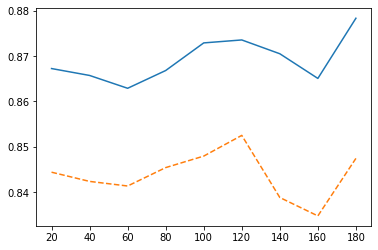

In [26]:
train_score=[]
test_score=[]
para_c=[ 20*i for i in range(1,10)]
for n in para_c:
    nn_scaled=MLPClassifier(random_state=1234,hidden_layer_sizes=(n,n),activation="relu",solver="adam")
    nn_scaled.fit(df_train_x,df_train_y)
    train_score.append(nn_scaled.score(df_train_x,df_train_y))
    test_score.append(nn_scaled.score(df_test_x,df_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["hidden layer"]=para_c
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_c,train_score,linestyle="-",label="Train")
plt.plot(para_c,test_score,linestyle="--",label="Test")

# customer_merge

In [0]:
df_customer_raw=pd.read_csv("./customer_merge_Category.csv")

df_customer=df_customer_raw.drop(["Unnamed: 0","Unnamed: 0.1","주문자ID"],axis=1)

df_customer_dummy=pd.get_dummies(df_customer)

df_customer_dummy.shape

# 데이터 split 

df_customer_dummy_train,df_customer_dummy_test=train_test_split(df_customer_dummy,test_size=0.3,random_state=1234)
df_customer_dummy_train_x=df_customer_dummy_train.drop(["상품구매금액"],axis=1)
df_customer_dummy_train_y=df_customer_dummy_train["상품구매금액"]
df_customer_dummy_test_x=df_customer_dummy_test.drop(["상품구매금액"],axis=1)
df_customer_dummy_test_y=df_customer_dummy_test["상품구매금액"]


# customer_merge MLP

In [0]:
train_score=[]
test_score=[]
para_c=[ 20*i for i in range(1,10)]
learning_rate=[ 0.001**i for i in range(1,3)]
for n in para_c:
    nn_scaled=MLPClassifier(random_state=1234,hidden_layer_sizes=(n,n),activation="relu",solver="adam",learning_rate_init=j)
    nn_scaled.fit(df_customer_dummy_train_x,df_customer_dummy_train_y)
    train_score.append(nn_scaled.score(df_customer_dummy_train_x,df_customer_dummy_train_y))
    test_score.append(nn_scaled.score(df_customer_dummy_test_x,df_customer_dummy_test_y))
df_socre_leaf=pd.DataFrame()
df_socre_leaf["hidden layer"]=para_c
df_socre_leaf["TrainScore"]=train_score
df_socre_leaf["TestScore"]=test_score
df_socre_leaf.round(3)

print(df_socre_leaf.round(3))
plt.plot(para_c,train_score,linestyle="-",label="Train")
plt.plot(para_c,test_score,linestyle="--",label="Test")

1e-06    20


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


1e-06    40
